In [1]:
!pip install plotly
!pip install bar_chart_race

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bar_chart_race as bcr

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS Internship Sep 2024/dataset_ev.csv')
df.shape

(112634, 17)

In [4]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702


In [5]:
df.drop_duplicates(inplace=True)
df.shape

(112634, 17)

In [6]:
df.nunique()

,0
VIN (1-10),7548
County,165
City,629
State,45
Postal Code,773
Model Year,20
Make,34
Model,114
Electric Vehicle Type,2
Clean Alternative Fuel Vehicle (CAFV) Eligibility,3


In [7]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


#### Dropping below columns as they don't seem to add much value to analysis also the data is way more diverse and having more null values among these columns
     VIN (1-10)
     Postal Code
     Base MSRP
     Legislative District
     DOL Vehicle ID
     Electric Utility
     2020 Census Tract

In [8]:
data = df.drop(columns=['VIN (1-10)','Postal Code', 'Base MSRP','Legislative District','DOL Vehicle ID',
                        'Electric Utility', '2020 Census Tract'])
data.shape

(112634, 10)

In [9]:
data.isnull().sum()

,0
County,0
City,0
State,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0
Vehicle Location,24


In [10]:
data.dropna(inplace=True)
data.isnull().sum()

,0
County,0
City,0
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0
Vehicle Location,0


In [11]:
data['County'].value_counts().idxmax()   #County with highest number of the vehicles

'King'

In [12]:
data['City'].value_counts().idxmax()   #City with highest number of vehicles

'Seattle'

In [13]:
data['State'].value_counts().idxmax()   # State with most number of vehicles

'WA'

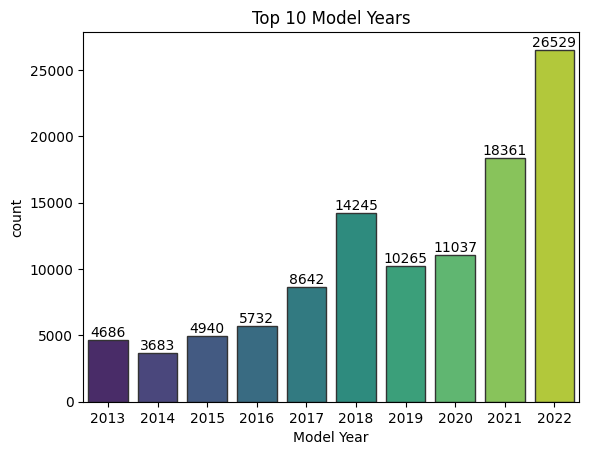

In [14]:
# Top 10 years with most number of vehicles
ax = sns.barplot(data['Model Year'].value_counts()[:10],edgecolor='.2',palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Top 10 Model Years')
plt.show()

In [15]:
data['Make'].value_counts().idxmax()

'TESLA'

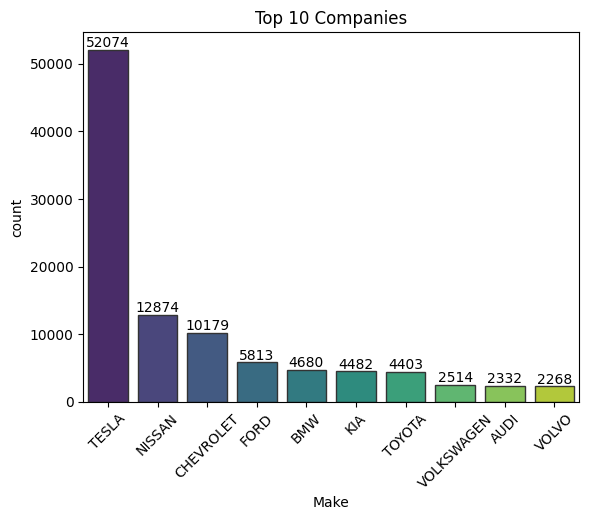

In [16]:
# Top 10 companies with most number of vehicles
ax = sns.barplot(data['Make'].value_counts()[:10],edgecolor='.2',palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Top 10 Companies')
plt.xticks(rotation=45)
plt.show()

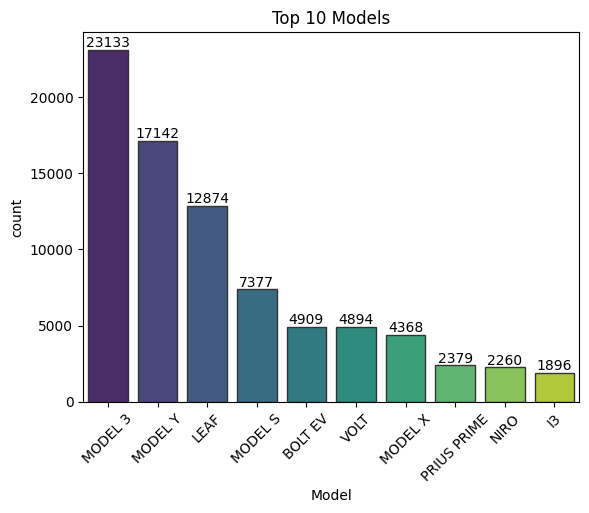

In [17]:
# Top 10 models with most number of vehicles
ax = sns.barplot(data['Model'].value_counts()[:10],edgecolor='.2',palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Top 10 Models')
plt.xticks(rotation=45)
plt.show()

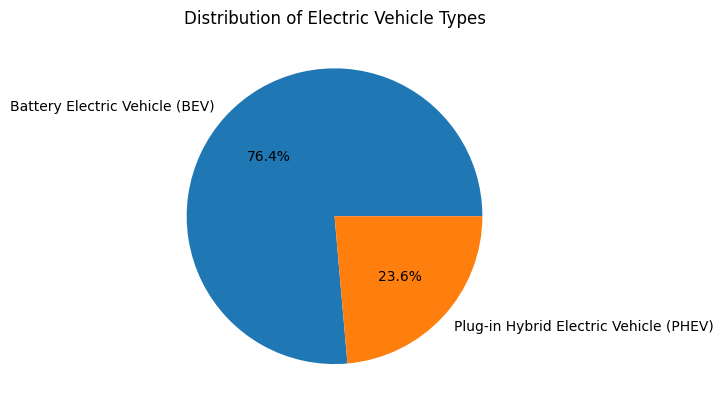

In [18]:
plt.pie(data['Electric Vehicle Type'].value_counts(), labels=data['Electric Vehicle Type'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Electric Vehicle Types')
plt.show()

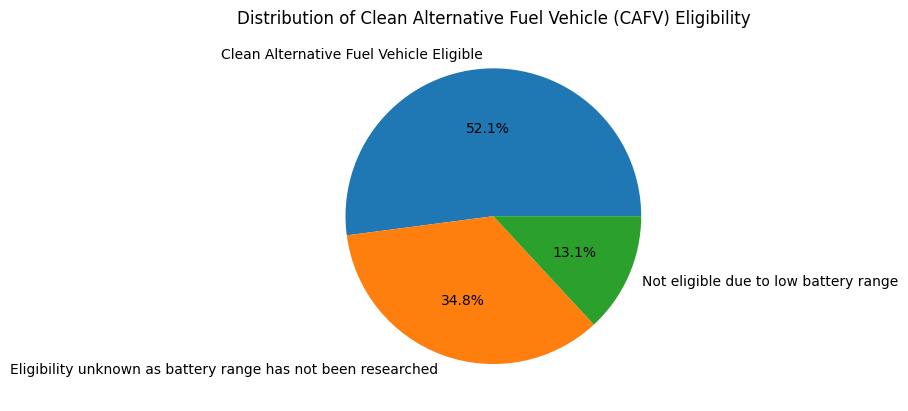

In [19]:
plt.pie(data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(),
        labels=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.show()

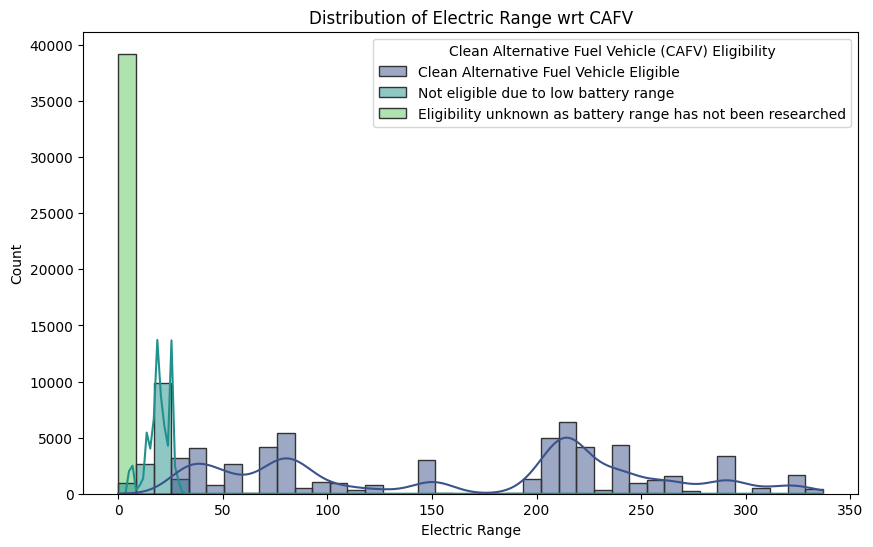

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(x=data['Electric Range'],hue= data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], edgecolor='.2', palette='viridis', kde=True)
plt.xlabel('Electric Range')
plt.title('Distribution of Electric Range wrt CAFV')
plt.show()

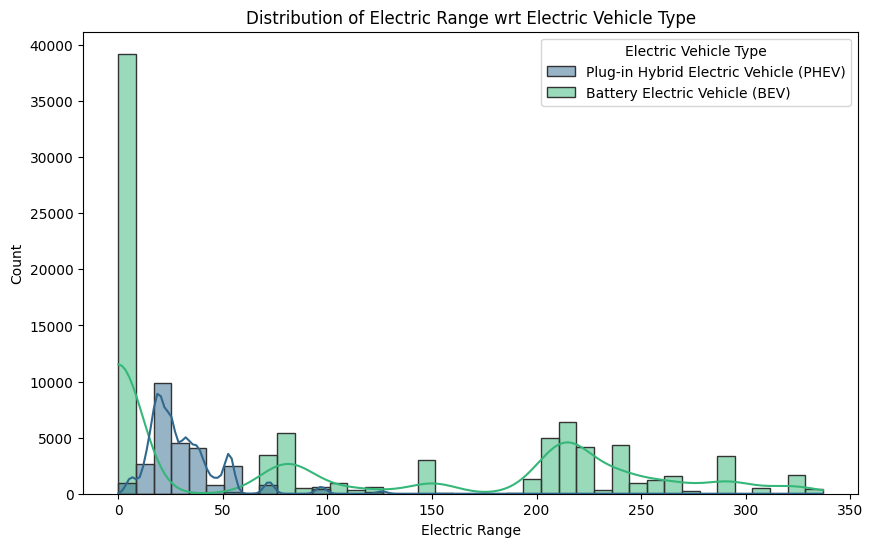

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(x=data['Electric Range'],hue= data['Electric Vehicle Type'], edgecolor='.2', palette='viridis', kde=True)
plt.xlabel('Electric Range')
plt.title('Distribution of Electric Range wrt Electric Vehicle Type')
plt.show()

In [22]:
data.groupby('Model')['Make'].count().sort_values(ascending=False)[:10]

,Make
Model,
MODEL 3,23133
MODEL Y,17142
LEAF,12874
MODEL S,7377
BOLT EV,4909
VOLT,4894
MODEL X,4368
PRIUS PRIME,2379
NIRO,2260


In [23]:
data.groupby('Model')['Electric Range'].mean().sort_values(ascending=False)[:10]

,Electric Range
Model,
KONA,258.000000
ROADSTER,234.351852
I-PACE,207.287671
MODEL S,189.588993
MODEL X,178.452839
BOLT EV,178.389489
MODEL 3,142.426793
E-TRON,136.249377
E-GOLF,106.918367


In [24]:
data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)[:10]

,Electric Range
Make,
JAGUAR,207.287671
TESLA,118.154108
CHEVROLET,109.791728
TH!NK,100.000000
NISSAN,89.328414
FIAT,85.624088
KIA,67.626283
AUDI,62.876930
SMART,62.282051


### Chloropeth Animation to display number of EV vehicles based on location

In [25]:
data['Vehicle Location'][0].split()

['POINT', '(-81.80023', '24.5545)']

In [26]:
data['long'] = data['Vehicle Location'].apply(lambda x: eval(x[7:-1].split()[0]))
data['lat'] = data['Vehicle Location'].apply(lambda x: eval(x[7:-1].split()[1]))

In [27]:
data.head(2)

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location,long,lat
0,Monroe,Key West,FL,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,POINT (-81.80023 24.5545),-81.80023,24.55450
1,Clark,Laughlin,NV,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,POINT (-114.57245 35.16815),-114.57245,35.16815


In [28]:
data_choro = data.groupby('Vehicle Location').count().sort_values(by='Make', ascending=False)

In [29]:
fig = px.scatter_geo(
    data_choro,
    lon='long',
    lat='lat',
    color='Make',
    color_continuous_scale='Viridis',
    title='Number of Electric Vehicles by Location',
    projection='natural earth'
)

fig.show()

In [30]:
states = list(df.groupby('State').count().sort_values(by='City', ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City', ascending=False)['City'].values

In [31]:
data_choro1 = pd.DataFrame(data.groupby('State').count().sort_values(by='City', ascending=False)['City'])
data_choro1.reset_index(inplace=True)
data_choro1.columns = ['State','Count']

fig = px.choropleth(
    data_choro1,
    locations = 'State',
    locationmode='USA-states',
    color = 'Count',
    color_continuous_scale='greens',
    scope = 'usa',
    title='Number of Electric Vehicles by State'
)

fig.show()

#### Racing Bar Plot to display the animation of EV Make and its count each year.

In [32]:
data_bcr = data.groupby(['Model Year','Make'])['Make'].count().reset_index(name='Count')
data_pivot = data_bcr.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

bcr.bar_chart_race(
    df=data_pivot,
    #filename='EV_Make_Count.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    steps_per_period=45,
    period_length = 3000,
    dpi=150,
    cmap='dark24')